# Titanic Dataset Analysis
In this notebook, we will perform an analysis of the Titanic dataset using Python libraries such as Pandas, Matplotlib, Seaborn, and Scikit-Learn.
This analysis includes data exploration, visualization, and a simple logistic regression model to predict survival.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('titanic_analysis.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Cleaning
We will fill missing values in the `Age` column with the median value, and any remaining missing values will be dropped.

In [14]:
# Fill missing values for Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop remaining missing values
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Exploratory Data Analysis (EDA)
We will create some visualizations to better understand the data.

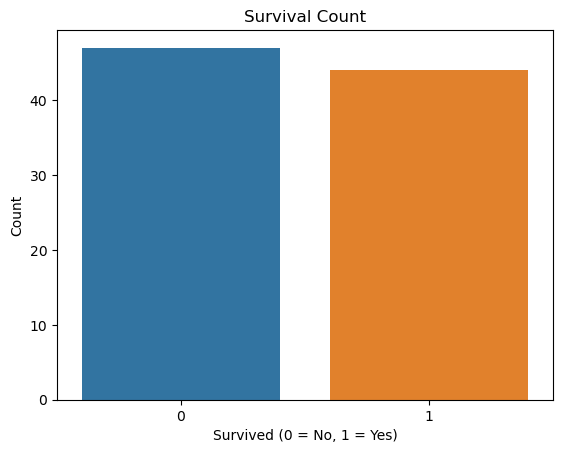

In [15]:
# Survival Count with labels
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


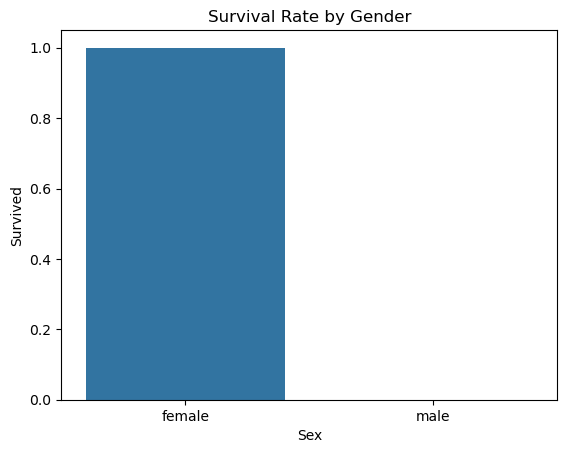

In [16]:
# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

## Feature Engineering
We will convert the `Sex` column into numerical values and create a `FamilySize` feature by adding the `SibSp` and `Parch` columns.

In [17]:
# Convert Sex column to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4
26,918,1,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,C,1
28,920,0,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,S,0


## Logistic Regression Model
We will now build a logistic regression model to predict survival based on the selected features.

In [18]:
# Features and labels
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

